<a href="https://colab.research.google.com/github/govindrathore27/randaugment/blob/main/DemoRandAugment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image matplotlib pycocotools wget


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/augkey')

In [ ]:
import operations
import randaug
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import wget
import zipfile
import os

from pycocotools.coco import COCO
from PIL import Image

In [ ]:
def download():
    if os.path.exists('annotations_trainval2017'):
        return
    
    wget.download('http://images.cocodataset.org/annotations/annotations_trainval2017.zip')
    with zipfile.ZipFile('annotations_trainval2017.zip', 'r') as zip_ref:
        zip_ref.extractall('annotations_trainval2017')
        
download()

In [ ]:
# Load the dataset
coco=COCO('annotations_trainval2017/annotations/person_keypoints_train2017.json')

# Get the image
image_ids = coco.getImgIds()[:1]
image_metas = coco.loadImgs(image_ids)
image_meta = image_metas[0]
image = io.imread(image_meta['coco_url'])

# Get the annotations
annotations_id = coco.getAnnIds(imgIds=[image_meta['id']])
annotations = coco.loadAnns(annotations_id)
bodyparts = np.array(annotations[0]['keypoints']).reshape(-1, 3)
visible = bodyparts[:,2] == 2
visible_bodyparts = bodyparts[visible][:,:2]

loading annotations into memory...
Done (t=12.08s)
creating index...
index created!


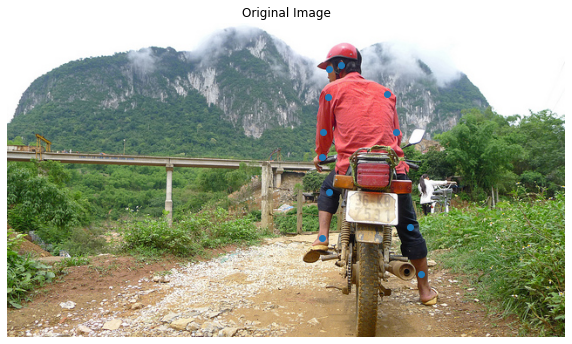

In [ ]:
def show_image_with_keypoints(image, keypoints, title):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    x, y = keypoints.T
    plt.scatter(x, y)
    plt.axis('off')
    plt.title(title)
    
show_image_with_keypoints(image, visible_bodyparts, "Original Image")

In [ ]:
# Create a new RandAug 
randaug = randaug.RandAugment(N=5)

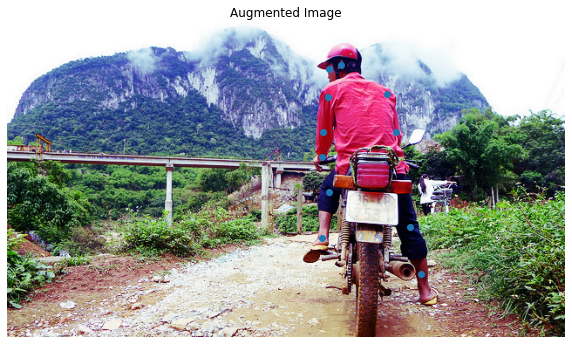

In [ ]:

# Get an augmentation plan
plan = randaug.plan_augment() 

# Apply the augmentation plan to the image and keypoints
augmented_image = randaug.apply_image(Image.fromarray(image), *plan)
augmented_keypoints = randaug.apply_keypoints(visible_bodyparts, *plan)

# Clip the keypoints 
show_image_with_keypoints(augmented_image, augmented_keypoints, "Augmented Image")

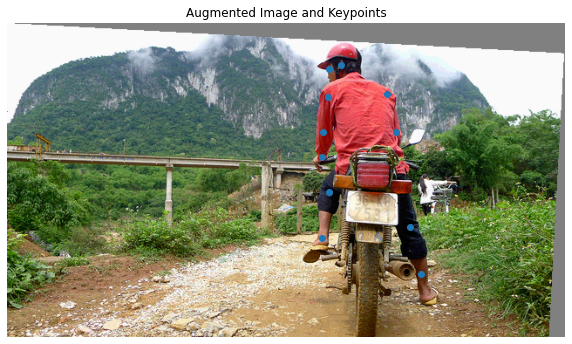

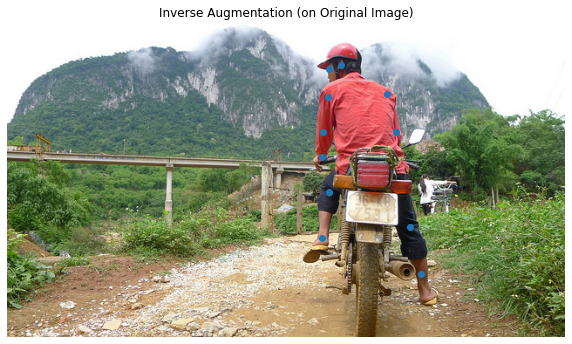

In [ ]:
plan = randaug.plan_augment() 

# Apply the augmentation plan to the image and keypoints
augmented_image = randaug.apply_image(Image.fromarray(image), *plan)
augmented_keypoints = randaug.apply_keypoints(visible_bodyparts, *plan)

# Show the augmented keypoints
show_image_with_keypoints(augmented_image, augmented_keypoints, "Augmented Image and Keypoints")

# Inverse Augmentation
keypoints = randaug.apply_inv_keypoints(augmented_keypoints, *plan)
show_image_with_keypoints(image, keypoints, "Inverse Augmentation (on Original Image)")